In [14]:
# This notebook is for exploration and data cleaning

import pandas as pd

# Load original dataset
df = pd.read_csv("../data/speed_dating_data.csv", encoding="ISO-8859-1")

# check first 5 rows
df.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [15]:
# Check the number of rows and columns
#df.shape

# Display column names
#df.columns

# Check data types of each column
df.dtypes



iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [16]:
# Show all column names
for col in df.columns:
    print(col)



iid
id
gender
idg
condtn
wave
round
position
positin1
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
undergra
mn_sat
tuition
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb

In [17]:
#data cleaning 

# Select and rename relevant columns
df_clean = df[[
    'iid', 'pid', 'gender', 'age', 'age_o', 'race_o',  # Basic info
    'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',  # Self ratings
    'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',  # Partner ratings
    'expnum', 'dec', 'dec_o', 'match'  # Selectivity & outcomes
]]

df_clean.columns = [
    'participant_id', 'partner_id', 'gender', 'age', 'partner_age', 'partner_race',
    'self_attractiveness', 'self_sincerity', 'self_intelligence', 'self_fun', 'self_ambition',  
    'partner_attractiveness', 'partner_sincerity', 'partner_intelligence', 'partner_fun', 'partner_ambition',  
    'expected_matches', 'decision_self', 'decision_partner', 'match'
]

# Drop rows with missing values in self traits 
df_clean = df_clean.dropna(subset=[
    'self_attractiveness', 'self_sincerity', 'self_intelligence', 'self_fun', 'self_ambition'
])


#quick stats
print("Missing values:")
print(df_clean.isnull().sum())

print("\nDataset info:")
df_clean.info()

print("\nSummary stats:")
df_clean.describe()




Missing values:
participant_id               0
partner_id                   8
gender                       0
age                         22
partner_age                102
partner_race                71
self_attractiveness          0
self_sincerity               0
self_intelligence            0
self_fun                     0
self_ambition                0
partner_attractiveness     203
partner_sincerity          275
partner_intelligence       295
partner_fun                348
partner_ambition           709
expected_matches          6499
decision_self                0
decision_partner             0
match                        0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 8279 entries, 0 to 8377
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          8279 non-null   int64  
 1   partner_id              8271 non-null   float64
 2   gender           

,participant_id,partner_id,gender,age,partner_age,partner_race,self_attractiveness,self_sincerity,self_intelligence,self_fun,self_ambition,partner_attractiveness,partner_sincerity,partner_intelligence,partner_fun,partner_ambition,expected_matches,decision_self,decision_partner,match
count,8279.000000,8271.000000,8279.000000,8257.000000,8177.000000,8208.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8076.000000,8004.000000,7984.000000,7931.000000,7570.000000,1780.000000,8279.000000,8279.000000,8279.000000
mean,284.905303,284.999637,0.501751,26.367325,26.372264,2.757919,22.424077,17.402178,20.278333,17.453971,10.682539,6.181885,7.171289,7.369614,6.396419,6.777081,5.571348,0.420945,0.418046,0.164271
std,158.469251,158.525651,0.500027,3.565468,3.553285,1.230278,12.428307,7.049939,6.781794,6.088271,6.124888,1.951868,1.743095,1.551297,1.954484,1.792443,4.765433,0.493741,0.493268,0.370544
min,1.000000,1.000000,0.000000,18.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,157.000000,0.000000,24.000000,24.000000,2.000000,15.000000,15.000000,17.390000,15.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,2.000000,0.000000,0.000000,0.000000
50%,282.000000,282.000000,1.000000,26.000000,26.000000,2.000000,20.000000,18.180000,20.000000,18.000000,10.000000,6.000000,7.000000,7.000000,7.000000,7.000000,4.000000,0.000000,0.000000,0.000000
75%,409.000000,409.000000,1.000000,28.000000,28.000000,4.000000,25.000000,20.000000,23.810000,20.000000,15.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,1.000000,0.000000
max,552.000000,552.000000,1.000000,55.000000,55.000000,6.000000,100.000000,60.000000,50.000000,50.000000,53.000000,10.500000,10.000000,10.000000,11.000000,10.000000,20.000000,1.000000,1.000000,1.000000


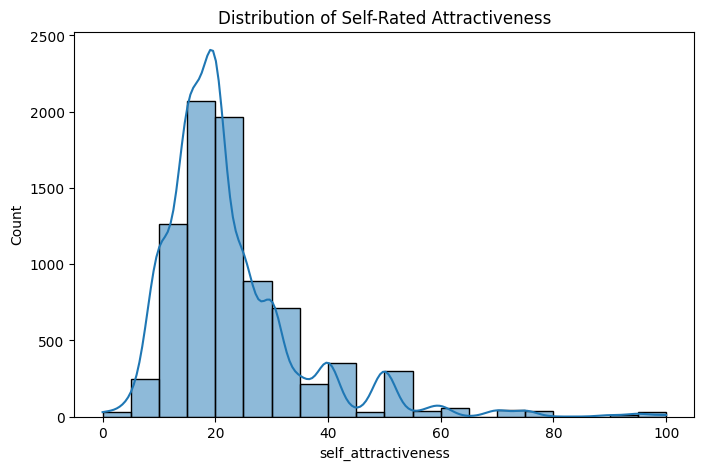

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df_clean['self_attractiveness'], bins=20, kde=True)
plt.title("Distribution of Self-Rated Attractiveness")
plt.show()


In [19]:
# Save cleaned data to CSV
df_clean.to_csv("../data/cleaned_speed_dating_data.csv", index=False)
